In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.core.pylabtools import figsize

# The plan

1. What’s a neural network?
2. Layers
3. Why do we care?
4. Common architectures:
    1. Convolutional networks
    2. Recurrent networks
    3. Graph networks
    4. Transformers 
    5. Dense networks
5. Using NNs in more complicated workflows

# What’s an artificial neural network?

* Complicated ML model built by concatenating simple pieces
* Layers between input and output are “hidden”
* Intermediate “representations”
* Train with mini batch stochastic gradient descent: 
    * draw a sample from your data
    * Pass data through the network
    * compute the value of the loss function on model outputs
    * Update model parameters by the derivative of the loss with respect to each parameter
    * Repeat many, many times
    
    
$\theta_{i+1} = \theta_{i} - \eta \nabla_{\theta}L[y_{i}, f(x_{i}; \theta)]$

for parameters $\theta$, learning rate $\eta$, batch data $x_{i}$, batch labels $y_{i}$, neural network $f$ and loss function $L$
    
<img src="img/neural_network_wikipedia.png"  style="width: 200px;"/>   

# What’s a layer?

* Weight layers do two things:
    * perform a linear transformation
    * Apply a nonlinear “activation function” element-wise
        * Intuition for sigmoid activation: each layer is a bunch of parallel logistic regressions
        * Intuition for ReLU activation: each layer is learning a set of linear piecewise functions
        
        
$f_{j} = \sigma(W_{j}x + b_{j})$
![](img/activation_functions.png)
* We can also include layers without trainable weights that:
    * Change statistics during training (batch normalization, dropout)
    * Change the representation by aggregating or transforming features (pooling)
    
* We can build layers that are compositions of other layers

![](img/residualblock.png)

# Why all the fuss about NNs?

* amazingly good at some tasks
* universal approximation theorems (not as useful as it sounds)
* can design layers (especially early ones) to generate representations that are equivariant to (approximate) symmetries of our problem
    * $f(T(x)) = T(f(x))$ for some symmetry transformation T
    * e.g. make the model’s job easier by preventing it from learning types of patterns you don’t want it to learn
    * every impressive NN application restricts what the NN can learn
* the model as a differentiable function opens up a lot of interesting applications


# Convolutional layers

* Geometry: Nd lattice 
* Equivariant to translation group
* Intuition: a small dense neural network that we apply as a sliding window across a sequence, image, or higher-order tensor
* Classic paper: “ImageNet Classification with Deep Convolutional Neural Networks” by Krizhevsky et al
* Useful reference: “A guide to convolution arithmetic for deep learning” by Dumoulin and Visin

![](img/convnet_from_dumoulin.png)

![](img/alexnet.png)

# Recurrent layers

* Geometry: 1D lattice
* Used for data that comes in a sequence. Used to be what everybody used for text.
* Good introductory read: Karpathy’s “The Unreasonable Effectiveness of Recurrent Neural Networks” http://karpathy.github.io/2015/05/21/rnn-effectiveness/ 

![](img/rnn_configurations_karpathy.jpeg)
![](img/lstm_cell_wikipedia.png)

# Graph neural networks

![](img/conv_vs_graph_conv_wu.png)

* Equivariant to permutation group (no ordering to neighbors of a node)
* Approaches differ in how they aggregate features from a node's neighbors
  * **graph convolution** features for node $u$: $\bigoplus_{v\in N_{u}}c_{uv}x_{v}$
  * **graph attention** features for node $u$: $\bigoplus_{v\in N_{u}}a(x_{u}, x_{v})x_{v}$
  * **message-passing** features for node $u$: $\bigoplus_{v\in N_{u}}\psi(x_{u}, x_{v})$
  
* graph convolution $\subseteq$ graph attention $\subseteq$ message passing
* Also spectral graph networks based on the graph Fourier transform
* Intro I found useful for relating to other graph methods: “Representation Learning on Graphs: Methods and Applications” by Hamilton et al
* Graph conv diagram from “A Comprehensive Survey on Graph Neural Networks” by Wu et al

![](img/kipf_welling_karateclub_gnn.png)

# Transformers

* Equivariant to permutation group 
* Convolutional architectures are necessarily building representations out of local comparisons. What if we have lattice-structured data but want to be able to model long-range behavior?
    * Build a graph neural network with a fully-connected graph
    * Encode position information in the inputs instead of the model architecture 

* Classic paper: “Attention is all you need” by Vaswani et al


![](img/transformer.png)

# Dense networks

* What if the data doesn’t have any structure you can exploit? e.g. tabular data?
* Generally better off using tree-based ensemble models in this case (“Tabular Data: Deep Learning is not All You Need” by Shwartz-Ziv, Armon https://arxiv.org/abs/2106.03253 )
* Exception might be cases where you’ve got sparse high-dimensional categorical variables that would benefit from a semantic embedding (“Wide and Deep learning for recommender systems”, Cheng et al https://arxiv.org/abs/1606.07792 )

# Using NNs as components in more complicated workflows

* boring but really useful stuff:
  * train a neural network on one task and "transfer learn" to a new task
  * freeze some pretrained weights and fine tune others for a different problem

# NN as a differentiable function

* Adversarial attack “Explaining and Harnessing Adversarial Examples” Goodfellow et al

![](img/adv_attack.png)

* Neural style transfer “A Neural Algorithm of Artistic Style” by Gatys et al

# Generative neural networks with a two-player game

* Generative adversarial networks
 * Build a **generator** network that inputs a random vector and outputs an image (or whatever your domain of interest is). So you can sample a random number and generate an image.
 * Build a **discriminator** network that inputs an image and outputs a probability.
 * Train both networks together:
   * train the discriminator to classify an image as either "real" or "fake" 
   * train the generator to fool the discriminator

* GAN “Generative Adversarial Networks” Goodfellow et al

# you can literally make this as complicated as you want

getty paper

# all the advice you didn't ask for

* Pytorch vs TensorFlow: just pick your favorite
* Don’t try to just learn theory without practicing. Lots of “folk knowledge” used to get results
* Don’t try to just run code you don’t understand without learning theory. Otherwise when something goes wrong you’re just guessing
* Lots of good books and classes out there.
    * Good application book: Deep Learning with Python by Chollet
    * Good theory book: Deep Learning by Goodfellow
    * Challenge book: Geometric Deep Learning: Grids, Groups, Graphs, Geodesics and Gauges by Bronstein et al
    
* Interpretation of academic literature is a skill you should develop
  * this field has serious hype/money issues other research fields don't
  * "improving on a benchmark" often required to get published or accepted in a conference --> unhealthy obsession with benchmarks that often aren't the whole study
  * pay close attention to hardware used, especially in Google/DeepMind papers

In [3]:
def relu(x):
    return x*(x > 0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

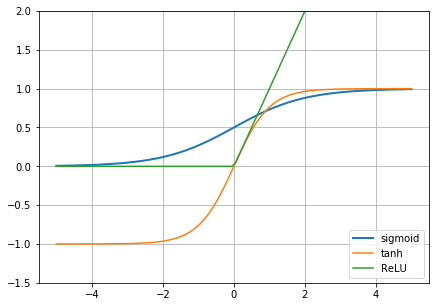

In [10]:
figsize(7,5)
x = np.linspace(-5,5,100)

plt.plot(x, sigmoid(x), lw=2, label="sigmoid")
plt.plot(x, np.tanh(x), label="tanh")
plt.plot(x, relu(x), label="ReLU")
plt.ylim(-1.5,2)
plt.legend(loc="lower right")
plt.grid(True);

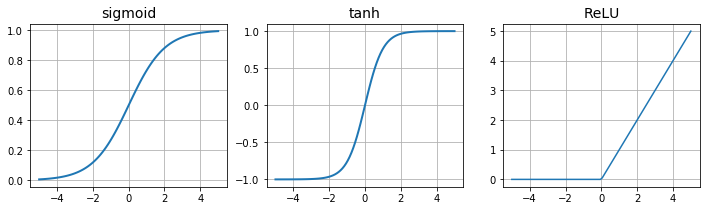

In [15]:
figsize(12,3)
x = np.linspace(-5,5,100)

plt.subplot(131)
plt.plot(x, sigmoid(x), lw=2)
plt.title("sigmoid", fontsize=14)
plt.grid(True);

plt.subplot(132)
plt.plot(x, np.tanh(x), lw=2)
plt.title("tanh", fontsize=14)
plt.grid(True);

plt.subplot(133)
plt.plot(x, relu(x), label="ReLU")
plt.title("ReLU", fontsize=14)
plt.grid(True);


